#[01] Tokenization

In [ ]:
%%capture
!pip install langchain
!pip install chromadb
!pip install sentence-transformers

In [ ]:
import re
from langchain.text_splitter import RecursiveCharacterTextSplitter, SentenceTransformersTokenTextSplitter
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from uuid import uuid4

In [ ]:
# max_length
def max_token_length(txt_list: list):
    max_length = 0
    for txt in txt_list:
        token_count = len(re.findall(r'\w+', txt))
        if token_count > max_length:
            max_length = token_count
    return f"Max Token Length: {max_length} tokens"

In [ ]:
lorem_ipsum = "Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Augue mauris augue neque gravida in fermentum et. Felis bibendum ut tristique et egestas quis ipsum suspendisse ultrices. Duis tristique sollicitudin nibh sit amet commodo nulla facilisi nullam. Pretium aenean pharetra magna ac placerat. Quis risus sed vulputate odio ut. Consectetur adipiscing elit duis tristique sollicitudin nibh. Nec nam aliquam sem et. Sed blandit libero volutpat sed cras. Faucibus pulvinar elementum integer enim neque volutpat ac. Mi in nulla posuere sollicitudin aliquam ultrices sagittis. Eget egestas purus viverra accumsan. Diam vel quam elementum pulvinar etiam non quam. Arcu cursus euismod quis viverra nibh cras. A scelerisque purus semper eget duis at. Lectus vestibulum mattis ullamcorper velit sed ullamcorper. Eget felis eget nunc lobortis mattis aliquam faucibus purus in. Elit scelerisque mauris pellentesque pulvinar pellentesque habitant. Ornare suspendisse sed nisi lacus sed. Interdum velit laoreet id donec ultrices. Ipsum a arcu cursus vitae congue mauris rhoncus aenean vel. Faucibus nisl tincidunt eget nullam non nisi. Urna condimentum mattis pellentesque id nibh. Tellus in hac habitasse platea dictumst vestibulum. Eget est lorem ipsum dolor. Enim eu turpis egestas pretium aenean pharetra magna ac placerat. Ac turpis egestas integer eget aliquet nibh. Vivamus arcu felis bibendum ut tristique et egestas. Nisi lacus sed viverra tellus in hac habitasse platea dictumst. Odio ut enim blandit volutpat maecenas volutpat. Turpis egestas sed tempus urna et pharetra pharetra massa. Dui nunc mattis enim ut tellus elementum sagittis vitae et. Nunc sed velit dignissim sodales ut eu. Aliquam ut porttitor leo a diam sollicitudin tempor id. At quis risus sed vulputate odio ut enim blandit volutpat. Gravida quis blandit turpis cursus in hac habitasse platea dictumst. Sit amet nulla facilisi morbi tempus iaculis urna. Diam maecenas sed enim ut sem viverra aliquet eget. Turpis egestas pretium aenean pharetra. At varius vel pharetra vel turpis nunc eget lorem. Integer quis auctor elit sed. Eget nunc lobortis mattis aliquam. Et magnis dis parturient montes nascetur ridiculus mus mauris vitae. Sollicitudin nibh sit amet commodo. Integer quis auctor elit sed vulputate mi sit amet mauris. Est placerat in egestas erat imperdiet. Ornare quam viverra orci sagittis eu volutpat odio facilisis mauris. Semper quis lectus nulla at volutpat diam. Amet volutpat consequat mauris nunc congue nisi. Ipsum nunc aliquet bibendum enim facilisis gravida neque convallis a. Et pharetra pharetra massa massa ultricies. Nunc eget lorem dolor sed viverra ipsum nunc aliquet bibendum."

In [ ]:
# %% Sentence splitter
# chroma default sentence model "all-MiniLM-L6-v2"
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
# max input length: 256 tokens (word pieces)

In [ ]:
model_max_chunk_length = 256
token_splitter = SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=model_max_chunk_length,
    model_name="all-MiniLM-L6-v2",
    chunk_overlap=0
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# split the text
lorem_ipsum_tokens = token_splitter.split_text(lorem_ipsum)
lorem_ipsum_tokens

['lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. augue mauris augue neque gravida in fermentum et. felis bibendum ut tristique et egestas quis ipsum suspendisse ultrices. duis tristique sollicitudin nibh sit amet commodo nulla facilisi nullam. pretium aenean pharetra magna ac placerat. quis risus sed vulputate odio ut. consectetur adipiscing elit duis tristique sollicitudin nibh. nec nam aliquam sem et. sed blandit libero volutpat sed cras. faucibus pulvinar elementum integer enim neque volutpat ac. mi in nulla posuere sollicitudin aliquam ultrices sagittis. eget egestas purus viverra accumsan. diam vel quam elementum pul',
 '##vinar etiam non quam. arcu cursus euismod quis viverra nibh cras. a scelerisque purus semper eget duis at. lectus vestibulum mattis ullamcorper velit sed ullamcorper. eget felis eget nunc lobortis mattis aliquam faucibus purus in. elit scelerisque mauris pellentesque pulvinar pellentesq

In [ ]:
# get max token length
max_token_length(lorem_ipsum_tokens)

'Max Token Length: 110 tokens'

#[02] Bible Vector DB

In [ ]:
# Real Implementation for large corpus (Bible)
text_path = "bible.txt"

with open(text_path, "r", encoding="utf-8") as f:
    text_raw = f.read()

text_raw[:1000]

'\ufeffThe Project Gutenberg eBook of The King James Version of the Bible\n    \nThis ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: The King James Version of the Bible\n\nRelease date: August 1, 1989 [eBook #10]\n                Most recently updated: April 6, 2024\n\nLanguage: English\n\n\n\n*** START OF THE PROJECT GUTENBERG EBOOK THE KING JAMES VERSION OF THE BIBLE ***\nThe Old Testament of the King James Version of the Bible\nThe First Book of Moses: Called Genesis\nThe Second Book of Moses: Called Exodus\nThe Third Book of Moses: Called Leviticus\nThe Fourth Book of Moses: Called 

In [ ]:
# Character splitter
character_splitter = RecursiveCharacterTextSplitter(
    separators=['\n    \n', '\n\n', '\n', '. '],
    chunk_size=1000,
    chunk_overlap=0,
)

text_splitted = character_splitter.split_text(text_raw)
print(f"Total number of splitted chunks: {len(text_splitted)}")

Total number of splitted chunks: 4986


In [ ]:
text_splitted[:4]

['\ufeffThe Project Gutenberg eBook of The King James Version of the Bible',
 'This ebook is for the use of anyone anywhere in the United States and\nmost other parts of the world at no cost and with almost no restrictions\nwhatsoever. You may copy it, give it away or re-use it under the terms\nof the Project Gutenberg License included with this ebook or online\nat www.gutenberg.org. If you are not located in the United States,\nyou will have to check the laws of the country where you are located\nbefore using this eBook.\n\nTitle: The King James Version of the Bible\n\nRelease date: August 1, 1989 [eBook #10]\n                Most recently updated: April 6, 2024\n\nLanguage: English',
 '*** START OF THE PROJECT GUTENBERG EBOOK THE KING JAMES VERSION OF THE BIBLE ***\nThe Old Testament of the King James Version of the Bible\nThe First Book of Moses: Called Genesis\nThe Second Book of Moses: Called Exodus\nThe Third Book of Moses: Called Leviticus\nThe Fourth Book of Moses: Called Numbe

In [ ]:
max_token_length(text_splitted)

'Max Token Length: 219 tokens'

In [ ]:
text_tokens = []
for text in text_splitted:
    text_tokens.extend(token_splitter.split_text(text))
print(f"Total number of tokens: {len(text_tokens)}")

Total number of tokens: 5363


In [ ]:
text_tokens[:4]

['the project gutenberg ebook of the king james version of the bible',
 'this ebook is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re - use it under the terms of the project gutenberg license included with this ebook or online at www. gutenberg. org. if you are not located in the united states, you will have to check the laws of the country where you are located before using this ebook. title : the king james version of the bible release date : august 1, 1989 [ ebook # 10 ] most recently updated : april 6, 2024 language : english',
 '* * * start of the project gutenberg ebook the king james version of the bible * * * the old testament of the king james version of the bible the first book of moses : called genesis the second book of moses : called exodus the third book of moses : called leviticus the fourth book of moses : called numbers the fifth book of mos

In [ ]:
# Check the token length
# reference: model card "By default, input text longer than 256 word pieces is truncated."
max_token_length(text_tokens)

'Max Token Length: 216 tokens'

In [ ]:
embedding_fn = SentenceTransformerEmbeddingFunction(
    model_name="all-MiniLM-L6-v2",
    device="cuda"
)

# Size of embedding vector
len(embedding_fn(text_tokens[0])[0])

384

In [ ]:
# initialize chromadb
# Client() creates a non-persistent Vector DB at runtime
chroma_db = chromadb.Client()
# chroma_collection = chroma_db.get_or_create_collection("bible", embedding_function=embedding_fn)
chroma_collection = chroma_db.create_collection("bible2", embedding_function=embedding_fn)

In [ ]:
# add all tokens to collection
ids = [str(uuid4()) for _ in range(len(text_tokens))] # get unuque identifier
print(ids[:4])

['ecec70e5-99ec-4343-8e91-01e1954d4a77', '46985640-8ed1-4ea5-b020-241999d2476d', '30f8c12c-3b39-496e-8854-979258f14a6b', '55e62229-4746-4c53-9737-b72dc5e4cc0f']


In [ ]:
chroma_collection.add(documents=text_tokens, ids=ids)

In [ ]:
# Run a Query
res = chroma_collection.query(query_texts=["what did noah do?"], n_results=10)

In [ ]:
res.keys()

dict_keys(['ids', 'distances', 'metadatas', 'embeddings', 'documents', 'uris', 'data', 'included'])

In [ ]:
res['documents'][0][:4]

['7 : 11 in the six hundredth year of noah ’ s life, in the second month, the seventeenth day of the month, the same day were all the fountains of the great deep broken up, and the windows of heaven were opened. 7 : 12 and the rain was upon the earth forty days and forty nights. 7 : 13 in the selfsame day entered noah, and shem, and ham, and japheth, the sons of noah, and noah ’ s wife, and the three wives of his sons with them, into the ark ; 7 : 14 they, and every beast after his kind, and all the cattle after their kind, and every creeping thing that creepeth upon the earth after his kind, and every fowl after his kind, every bird of every sort. 7 : 15 and they went in unto noah into the ark, two and two of all flesh, wherein is the breath of life. 7 : 16 and they that went in, went in male and female of all flesh, as god had commanded him : and the lord shut him in.',
 '7 : 24 and the waters prevailed upon the earth an hundred and fifty days. 8 : 1 and god remembered noah, and ever

#[03] Movies Vector DB

In [ ]:
# packages
import re
import pandas as pd
import seaborn as sns
from langchain.text_splitter import SentenceTransformersTokenTextSplitter
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from pprint import pprint

In [ ]:
# max length
def max_word_count(txt_list: list):
    max_length = 0
    for txt in txt_list:
        word_count = len(re.findall(r'\w+', txt))
        if word_count > max_length:
            max_length = word_count
    return f"Max Word Count: {max_length} words"

In [ ]:
# %% Sentence splitter
# chroma default sentence model "all-MiniLM-L6-v2"
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
# max input length: 256 tokens (word pieces)

model_max_chunk_length = 256
token_splitter = SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=model_max_chunk_length,
    model_name="all-MiniLM-L6-v2",
    chunk_overlap=0,
)

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when p

In [ ]:
# Data Import
text_path = "movies.csv"
df_movies_raw = pd.read_csv(text_path, parse_dates=['release_date'])
df_movies_raw.head(2)

<ipython-input-4-9837ffc50d58>:3: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies_raw = pd.read_csv(text_path, parse_dates=['release_date'])


id                            title                            genres  \
0  823464  Godzilla x Kong: The New Empire  Science Fiction-Action-Adventure   
1  615656                Meg 2: The Trench     Action-Science Fiction-Horror   

  original_language                                           overview  \
0                en  Following their explosive showdown Godzilla an...   
1                en  An exploratory dive into the deepest depths of...   

   popularity                               production_companies release_date  \
0   10484.676           Legendary Pictures-Warner Bros. Pictures   2024-03-27   
1    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   

        budget      revenue  runtime    status                       tagline  \
0  150000000.0  558503759.0    115.0  Released  Rise together or fall alone.   
1  129000000.0  352056482.0    116.0  Released             Back for seconds.   

   vote_average  vote_count  \
0         7.246      1878.0   
1         7.079      1365.0   

                                             credits  \
0  Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...   
1  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   

                                            keywords  \
0  giant monster-sequel-dinosaur-kaiju-fantasy wo...   
1                based on novel or book-sequel-kaiju   

                        poster_path                     backdrop_path  \
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  /j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg   
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   

                                     recommendations  
0  1011985-1275232-359410-601796-967847-653346-69...  
1  1006462-298618-569094-1061181-346698-1076487-6...

In [ ]:
# filter movies for missing title or overview
df_movies_filt = df_movies_raw.dropna(subset=['title', 'overview'])

df_movies_filt.head(2)

id                            title                            genres  \
0  823464  Godzilla x Kong: The New Empire  Science Fiction-Action-Adventure   
1  615656                Meg 2: The Trench     Action-Science Fiction-Horror   

  original_language                                           overview  \
0                en  Following their explosive showdown Godzilla an...   
1                en  An exploratory dive into the deepest depths of...   

   popularity                               production_companies release_date  \
0   10484.676           Legendary Pictures-Warner Bros. Pictures   2024-03-27   
1    8763.998  Apelles Entertainment-Warner Bros. Pictures-di...   2023-08-02   

        budget      revenue  runtime    status                       tagline  \
0  150000000.0  558503759.0    115.0  Released  Rise together or fall alone.   
1  129000000.0  352056482.0    116.0  Released             Back for seconds.   

   vote_average  vote_count  \
0         7.246      1878.0   
1         7.079      1365.0   

                                             credits  \
0  Rebecca Hall-Brian Tyree Henry-Dan Stevens-Kay...   
1  Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...   

                                            keywords  \
0  giant monster-sequel-dinosaur-kaiju-fantasy wo...   
1                based on novel or book-sequel-kaiju   

                        poster_path                     backdrop_path  \
0  /v4uvGFAkKuYfyKLGZnYj6l47ERQ.jpg  /j3Z3XktmWB1VhsS8iXNcrR86PXi.jpg   
1  /4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg  /qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg   

                                     recommendations  
0  1011985-1275232-359410-601796-967847-653346-69...  
1  1006462-298618-569094-1061181-346698-1076487-6...

In [ ]:
# filter for unique ids
df_movies_filt = df_movies_filt.drop_duplicates(subset=['id'])

df_movies_filt.shape # (36976, 20)

(428360, 20)

In [ ]:
max_word_count(df_movies_filt['overview'])

'Max Word Count: 231 words'

<Axes: ylabel='Count'>

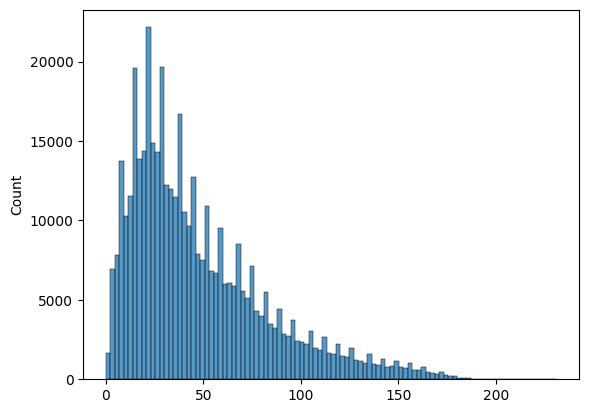

In [ ]:
# Word Distribution
description_len = []
for txt in df_movies_filt.loc[:, "overview"]:
    description_len.append(len(re.findall(r'\w+', txt)))

# visualize word-count distribution
sns.histplot(description_len, bins=100)

In [ ]:
# Embedding Function
embedding_fn = SentenceTransformerEmbeddingFunction(
    model_name="all-MiniLM-L6-v2",
    device="cuda"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [ ]:
# chroma_db = chromadb.Client() # on the fly

# persistent
chroma_db = chromadb.PersistentClient('db')

In [ ]:
# List Collection
chroma_db.list_collections()

[Collection(id=211b731a-cf07-45ba-96e8-d48b79882799, name=movies)]

In [ ]:
# Get / Create Collection
chroma_collection = chroma_db.get_or_create_collection("movies", embedding_function=embedding_fn)

In [ ]:
chroma_db.list_collections()

[Collection(id=211b731a-cf07-45ba-96e8-d48b79882799, name=movies)]

In [ ]:
# add all tokens to collection
ids = df_movies_filt['id'].astype(str).tolist()
print(ids)

['823464', '615656', '758323', '667538', '693134', '640146', '677179', '614479', '569094', '653346', '956101', '572802', '447277', '594767', '455476', '753342', '573435', '933131', '968051', '965839', '280180', '670292', '150540', '763215', '772515', '619930', '695721', '639720', '726209', '697843', '786892', '758009', '32516', '762430', '842544', '848326', '511617', '420808', '315162', '267805', '746036', '762441', '940551', '882569', '799155', '299054', '892070', '770509', '614930', '843794', '519182', '840326', '603692', '119450', '862553', '920143', '787699', '713704', '941520', '845885', '965571', '852096', '385687', '587092', '736526', '676547', '838484', '931954', '746524', '858017', '826753', '663210', '748783', '807172', '846433', '967847', '287003', '937249', '283995', '788752', '575264', '800815', '466420', '947938', '11', '346698', '635302', '943221', '700391', '599019', '661374', '842942', '872585', '966220', '945729', '614933', '899112', '818422', '884605', '616037', '869

In [ ]:
documents = df_movies_filt['overview'].tolist()
print(documents[:4])

['Following their explosive showdown Godzilla and Kong must reunite against a colossal undiscovered threat hidden within our world challenging their very existence – and our own.', 'An exploratory dive into the deepest depths of the ocean of a daring research team spirals into chaos when a malevolent mining operation threatens their mission and forces them into a high-stakes battle for survival.', "Father Gabriele Amorth Chief Exorcist of the Vatican investigates a young boy's terrifying possession and ends up uncovering a centuries-old conspiracy the Vatican has desperately tried to keep hidden.", 'When a new threat capable of destroying the entire planet emerges Optimus Prime and the Autobots must team up with a powerful faction known as the Maximals. With the fate of humanity hanging in the balance humans Noah and Elena will do whatever it takes to help the Transformers as they engage in the ultimate battle to save Earth.']


In [ ]:
titles = df_movies_filt['title'].tolist()
print(titles[:4])

['Godzilla x Kong: The New Empire', 'Meg 2: The Trench', "The Pope's Exorcist", 'Transformers: Rise of the Beasts']


In [ ]:
metadatas = [{'title':title} for title in titles]

In [ ]:
# Add movies to vector DB
# add documents in batches of 5000
batch_size = 5000
for i in range(0, len(ids), batch_size):
    chroma_collection.add(ids=ids[i:i+batch_size],
                          documents=documents[i:i+batch_size],
                          metadatas=metadatas[i:i+batch_size])
    print(i)

In [ ]:
# count of documents in collection
len(chroma_collection.get()['ids'])

In [ ]:
# Function to get title
def get_title_by_description(query_text:str):
    n_results = 3
    res = chroma_collection.query(query_texts=[query_text],
                                  n_results=n_results)
    for i in range(n_results):
        pprint(f"Title: {res['metadatas'][0][i]['title']} \n")
        pprint(f"Decription: {res['documents'][0][i]} \n")
        pprint("-" * 90)

In [ ]:
# Test the function
get_title_by_description(query_text="monster, underwater")

In [ ]:
# Test the function
get_title_by_description(query_text="superhero, spider")

#[04] Multimodal Vector DB

In [1]:
%%capture
!pip install langchain
!pip install chromadb
!pip install sentence-transformers
!pip install open_clip_torch

In [7]:
# packages
import os
import numpy as np
from matplotlib import pyplot as plt

import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import open_clip

In [8]:
# load model
# source: https://pypi.org/project/open-clip-torch-any-py3/

model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')

100%|████████████████████████████████████████| 605M/605M [00:01<00:00, 446MiB/s]


In [9]:
model

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (patch_dropout): Identity()
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): ModuleList(
        (0-11): 12 x ResidualAttentionBlock(
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ls_1): Identity()
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ls_2): Identity()
        )
      )
    )
    (ln_post): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  

In [10]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    <function _convert_to_rgb at 0x78774e7c1c60>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

In [16]:
# prepare vector db
chroma_db = chromadb.Client()
img_loader = ImageLoader()
multimodal_embedding_fn = OpenCLIPEmbeddingFunction(device="cpu")

chroma_collection = chroma_db.get_or_create_collection("dogs",
                                                       embedding_function=multimodal_embedding_fn,
                                                       data_loader=img_loader)

In [14]:
# add images to DB
img_folder = './dogs'
img_files = os.listdir(img_folder)
img_files = [f"{img_folder}/{img_file}" for img_file in img_files]

img_files

['./dogs/akita_1.jpg',
 './dogs/corgi_13.jpg',
 './dogs/akita_3.jpg',
 './dogs/entlebucher_001.jpg',
 './dogs/affenpinscher_3.jpg',
 './dogs/mastiff_1.jpg']

In [17]:
chroma_collection.add(ids=img_files, documents=img_files, uris=img_files)

In [18]:
chroma_collection.get()

{'ids': ['./dogs/affenpinscher_3.jpg',
  './dogs/akita_1.jpg',
  './dogs/akita_3.jpg',
  './dogs/corgi_13.jpg',
  './dogs/entlebucher_001.jpg',
  './dogs/mastiff_1.jpg'],
 'embeddings': None,
 'metadatas': [None, None, None, None, None, None],
 'documents': ['./dogs/affenpinscher_3.jpg',
  './dogs/akita_1.jpg',
  './dogs/akita_3.jpg',
  './dogs/corgi_13.jpg',
  './dogs/entlebucher_001.jpg',
  './dogs/mastiff_1.jpg'],
 'uris': None,
 'data': None,
 'included': ['metadatas', 'documents']}

In [19]:
# helper function to show query results
def show_query_results(query_list:list, query_result:dict):
    res_count = len(query_result['ids'][0])
    for i in range(len(query_list)):
        print(f"Query: {query_list[i]}")
        for j in range(res_count):
            id = query_result['ids'][i][j]
            distance = query_result['distances'][i][j]
            data = query_result['data'][i][j]
            uri = query_result['uris'][i][j]
            print(f"Result {j} : {uri} with distance: {np.round(distance, 2)}")
            plt.imshow(data)
            plt.axis('off')
            plt.show()

In [20]:
# Query Text
query_list = ["dog in grassland"]

query_result = chroma_collection.query(query_texts=query_list,
                                       n_results=3,
                                       include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

In [22]:
query_result['ids']

[['./dogs/mastiff_1.jpg', './dogs/corgi_13.jpg', './dogs/affenpinscher_3.jpg']]

In [23]:
query_result['distances']

[[0.8775801658630371, 0.8884897828102112, 0.9753701686859131]]

Query: dog in grassland
Result 0 : ./dogs/mastiff_1.jpg with distance: 0.88


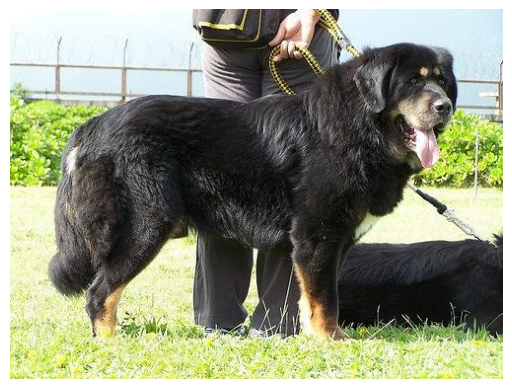

Result 1 : ./dogs/corgi_13.jpg with distance: 0.89


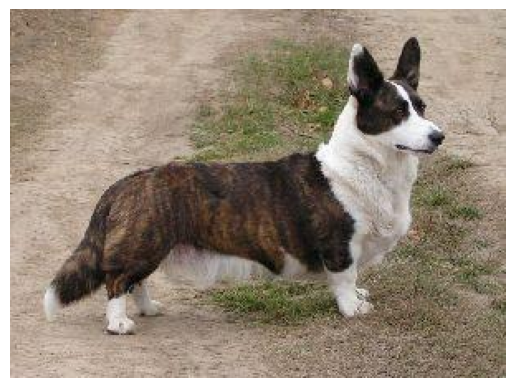

Result 2 : ./dogs/affenpinscher_3.jpg with distance: 0.98


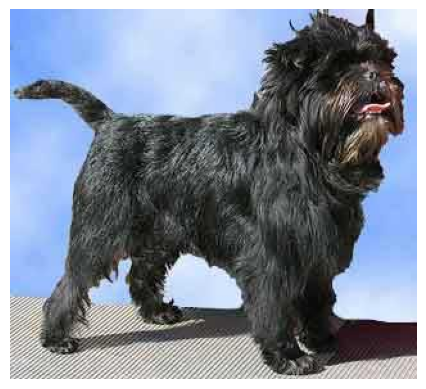

In [30]:
show_query_results(query_list, query_result)

Query: akita
Result 0 : ./dogs/akita_1.jpg with distance: 0.21


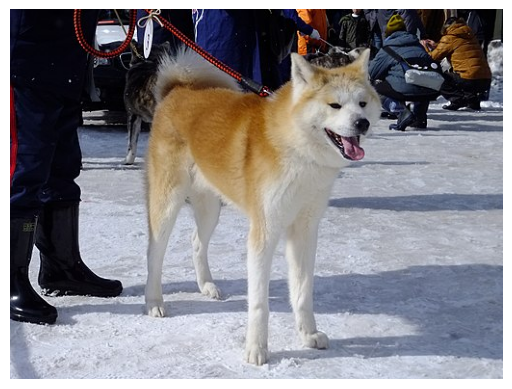

Result 1 : ./dogs/akita_3.jpg with distance: 0.21


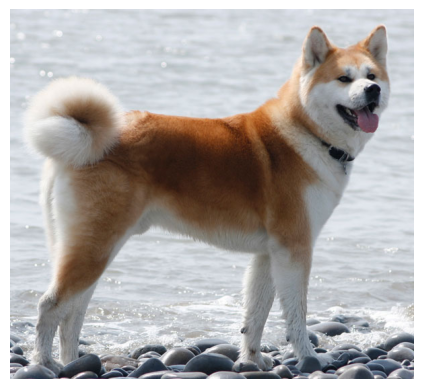

Result 2 : ./dogs/corgi_13.jpg with distance: 0.77


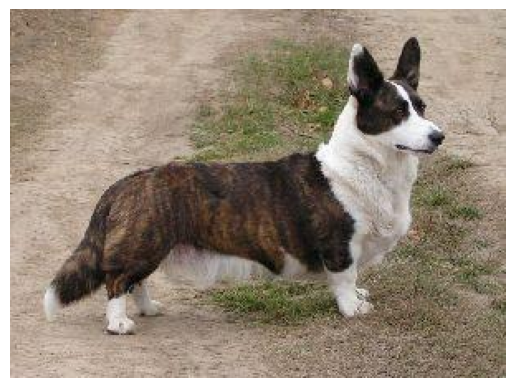

In [34]:
# query_list = ['dog in black fur']
# query_list = ['dog, water']
query_list = ['akita']

query_result = chroma_collection.query(query_texts=query_list,
                                       n_results=3,
                                       include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

show_query_results(query_list, query_result)

Query: ./dogs/akita_1.jpg
Result 0 : ./dogs/akita_1.jpg with distance: 0.0


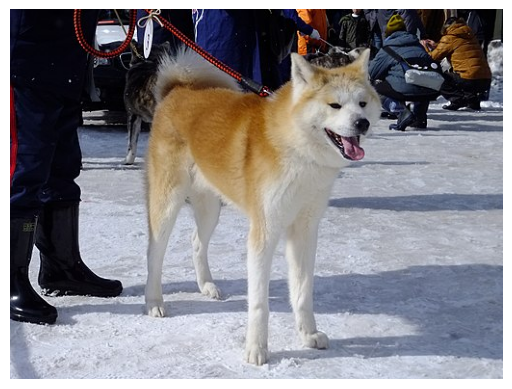

Result 1 : ./dogs/akita_3.jpg with distance: 0.0


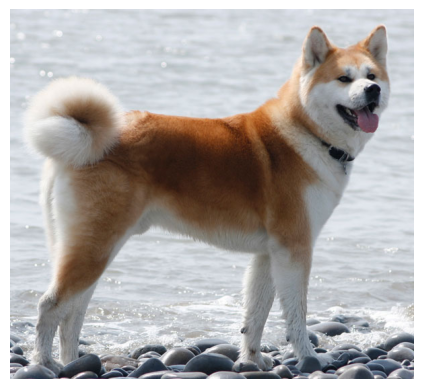

In [36]:
# Query Image
query_list = ['./dogs/akita_1.jpg']
query_result = chroma_collection.query(query_images=query_list,
                                       n_results=2, include=['documents', 'distances', 'metadatas', 'data', 'uris'],)
show_query_results(query_list, query_result)